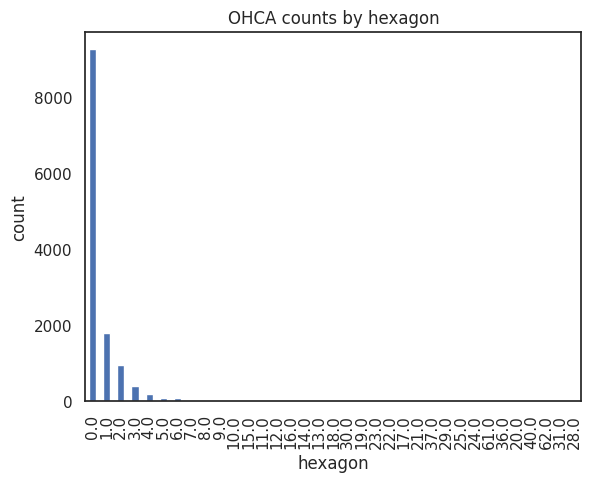

In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# read main_hexagon_df.csv
df = pd.read_csv('main_hexagon_df.csv')
#rename unnamed column
df.rename(columns={'Unnamed: 0':'hex_id'}, inplace=True)
# make it a index
df.set_index('hex_id', inplace=True)

# apply np.maximum(0, df['OHCA']) to OHCA column
df['OHCA'] = np.maximum(0, df['OHCA'])

# make a bar chart of OHCA counts by hexagon
df['OHCA'].value_counts().plot(kind='bar')
plt.title('OHCA counts by hexagon')
plt.xlabel('hexagon')
plt.ylabel('count')
plt.show()

[  0  75  95  90 100]


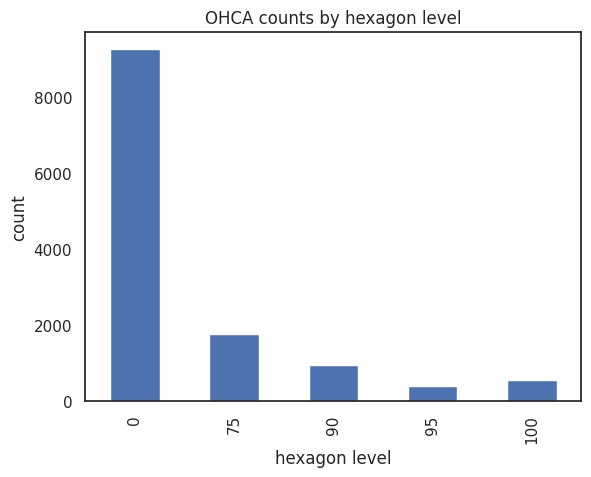

In [86]:
# now split by 5%s
procent = 0.05
df['lvl2'] = 0
for i in np.arange(procent, 1, procent):
    df.loc[df['OHCA'] > df['OHCA'].quantile(i), 'lvl2'] = np.round((i+procent)*100)
print(df['lvl2'].unique()) # [  0  75  95  90 100]
# draw a bar chart of OHCA counts by hexagon level
# sort by number in the front
df['lvl2'].value_counts().sort_index().plot(kind='bar')
plt.title('OHCA counts by hexagon level')
plt.xlabel('hexagon level')
plt.ylabel('count')
plt.show()